# Практическое задание №7

## Задание 1-2
Взять все признаки из датасета с урока. Применить модель Random Forest.

Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

In [ ]:
features = [['LSTAT','RM'], ['LSTAT','RM', 'PTRATIO'], ['LSTAT','RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'], ['DIS', 'RAD']]

In [ ]:
metrics_RandomForest = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
metrics_LinearRegration= pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  clf = RandomForestRegressor(n_estimators=100)
  clf.fit(x_train, y_train)
  pred_train = clf.predict(x_train)
  pred_test = clf.predict(x_test)
  
  metrics_RandomForest = metrics_RandomForest.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)
  
  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics_LinearRegration = metrics_LinearRegration.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

In [ ]:
print(metrics_RandomForest)

                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   1.567525  4.002431   4.982267  32.017487  0.942000  0.591060
1       [LSTAT, RM, PTRATIO]   1.249926  3.038922   3.310395  17.688088  0.961463  0.774081
2  [LSTAT, RM, PTRATIO, TAX]   1.044656  2.906608   2.376575  15.452930  0.972334  0.802629
3                 [DIS, AGE]   2.803540  6.752887  15.473012  88.084550  0.819875 -0.125050
4                 [DIS, RAD]   2.662998  5.779086  14.425096  66.797115  0.832074  0.146841


## Задание 3
Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.

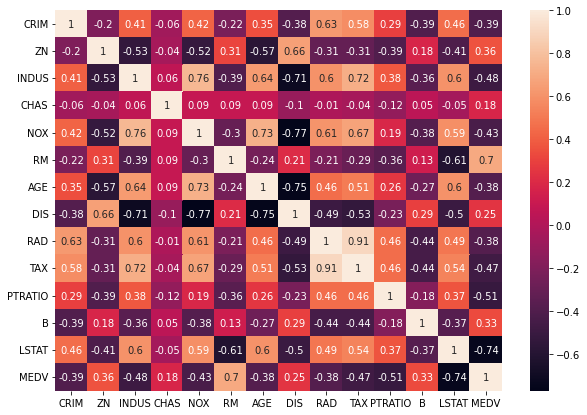

In [ ]:
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
print(metrics_RandomForest)

                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   1.567525  4.002431   4.982267  32.017487  0.942000  0.591060
1       [LSTAT, RM, PTRATIO]   1.249926  3.038922   3.310395  17.688088  0.961463  0.774081
2  [LSTAT, RM, PTRATIO, TAX]   1.044656  2.906608   2.376575  15.452930  0.972334  0.802629
3                 [DIS, AGE]   2.803540  6.752887  15.473012  88.084550  0.819875 -0.125050
4                 [DIS, RAD]   2.662998  5.779086  14.425096  66.797115  0.832074  0.146841


Признаки [LSTAT, RM, PTRATIO, TAX] обладают самым высоким по модулю коэффициентом корреляции среди всех представленных признаков и целевого значения (соотвктсвенно, [-0.74, 0.7, -0.51, -0.47] - заметная корреляция с целевым признаком)

Заметная корреляция между самими признаками наблюдается только у пары [LSTAT, RM]

При использовании модели Random Forest наименьшая среднедние абсолютная и квадратическая ошибки наблюдаются при использовании всех четырёх этих признаков.

Так же при использовании всех четырёх признаков мы получаем наилучшие результаты по доле объясненной вариации (R_squared) для обучающей и тестовой выборки (0.972334  0.802629, соответсвенно)
__________
Признаки [DIS, AGE, RAD] не обладают ярковыраженной корреляцией с целевым признаком и при этом значения среднедних абсолютной и квадратической ошибок увеличиваются в 2-2.5 раза при использовании модели Random Forest.

Попарно признаки [DIS, AGE] и [DIS, RAD] обладают заметной корреляцией между собой.

Доля объясненной вариации (R_squared) также падает для признаков с меньшей корреляцией с целевым признаком  (для тестовой выборки наблюдается значительное падение)
______________
Из представленных выше наблюдений можно сделать вывод, что при использовании модели Random Forest лучшие показатели качества (минимальные среднедние абсолютная и квадратическая ошибки и Доля объясненной вариации максимально приближенная к 1) наблюдаются при использовании в модели параметров обладающей наивысшими коэффициентами корреляции с целевым признаком, тогда как корреляция признаков между собой не вносит значительного вклада в качество модели.

## Задание 4
Сравнить показатели качества новой модели с моделью с урока и сделать вывод.

In [ ]:
print(metrics_LinearRegration)

                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   3.737640  3.704153  25.989649  21.950384  0.697449  0.719641
1       [LSTAT, RM, PTRATIO]   3.375341  3.165985  22.782518  15.738021  0.734784  0.798988
2  [LSTAT, RM, PTRATIO, TAX]   3.408744  3.359143  24.985324  18.729697  0.709141  0.760777
3                 [DIS, AGE]   6.382372  5.948582  78.129578  73.212529  0.090477  0.064901
4                 [DIS, RAD]   6.236853  5.921109  74.797832  66.152299  0.129262  0.155077


In [ ]:
print(metrics_RandomForest)

                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   1.544079  4.051088   4.694365  33.109170  0.945352  0.577117
1       [LSTAT, RM, PTRATIO]   1.274171  3.068735   3.470769  17.401310  0.959596  0.777744
2  [LSTAT, RM, PTRATIO, TAX]   1.008530  2.872206   2.242604  15.293725  0.973893  0.804663
3                 [DIS, AGE]   2.816283  6.647147  15.892128  85.624338  0.814996 -0.093628
4                 [DIS, RAD]   2.684337  5.825042  14.848997  64.796497  0.827140  0.172394


Несмотря на увеличение качества модели Random Forest по сравнение с моделью Linear Regration (снижение значений ошибок и рост доли объясненной вариации) для обучающей выборки, нельзя не заметить значительное увеличение значений ошибок и снижение доли объясненной вариации для тестовой выборки (в Random Forest).

Исходя из вышесказанного, можно сделать вывод, что при использовании данного датасета модель Random Forest склонна к переобучению. То есть модель Linear Regration более стабильна.

Но при грамотном выборе признаков при использовании модели Random Forest, мы можем достичь в тестовой выборке схожего значения по средним ошибкам, что и у модели Linear Regration, но с более высоким значением доли объясненной вариации.
______

При использованиии признаков [LSTAT, RM, PTRATIO, TAX] получим следующие значения парамтров качества для тестовых выборок

In [ ]:
table = pd.DataFrame({'Metrics': ['MAE test', 'MSE test', 'R2 test'],'LinearRegration': [3.359143, 18.729697, 0.760777], 'RandomForest': [2.872206, 15.293725, 0.804663]})
table.set_index('Metrics')

,LinearRegration,RandomForest
Metrics,,
MAE test,3.359143,2.872206
MSE test,18.729697,15.293725
R2 test,0.760777,0.804663


Итого: модель Random Forest менее стабильна (более склонна к переобучению), чем модель Linear Regration. Но также и более чувсвительна к подбору параметров для модели.

Поэтому аккуратным подбором параметров можно достичь более высокого качества модели при использованиии Random Forest, но на свой страх и риск, помня о склонности модели к переобучению